In [611]:
import psycopg2
import pandas as pd
import sqlalchemy
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

conn_string = "host='localhost' dbname='stockmarket' user='postgres' password='123456'"

conn = psycopg2.connect(conn_string)
#n = input('Enter the id of companies')

df = pd.read_sql_query(
    '''select i.date ,i.open ,i.high ,i.low ,i.close ,i.adj_close ,i.volume ,c.name
    from information i 
    join company c
    on i.company_id=c.id
    where company_id = {}'''.format(1)  , conn, index_col='date',parse_dates=True)

#df.index = pd.to_datetime(df.index)


conn.close()

df = df.dropna()

df['open-close'] = df.open - df.close


df['high-low'] = df.high - df.low

print (df.head())



                open      high       low     close  adj_close        volume  \
date                                                                          
1986-03-13  0.088542  0.101563  0.088542  0.097222   0.071441  1.031789e+09   
1986-03-14  0.097222  0.102431  0.097222  0.100694   0.073992  3.081600e+08   
1986-03-17  0.100694  0.103299  0.100694  0.102431   0.075268  1.331712e+08   
1986-03-18  0.102431  0.103299  0.098958  0.099826   0.073354  6.776640e+07   
1986-03-19  0.099826  0.100694  0.097222  0.098090   0.072079  4.789440e+07   

            name  open-close  high-low  
date                                    
1986-03-13  MSFT   -0.008680  0.013021  
1986-03-14  MSFT   -0.003472  0.005209  
1986-03-17  MSFT   -0.001737  0.002605  
1986-03-18  MSFT    0.002605  0.004341  
1986-03-19  MSFT    0.001736  0.003472  


In [612]:

df2 = df[['open']].reset_index()
#df2
df2=df2.rename(columns={'date':'ds', 'open':'y'})
#df2.index = pd.to_datetime(df2.index)



print (df2)



             ds          y
0    1986-03-13   0.088542
1    1986-03-14   0.097222
2    1986-03-17   0.100694
3    1986-03-18   0.102431
4    1986-03-19   0.099826
5    1986-03-20   0.098090
6    1986-03-21   0.095486
7    1986-03-24   0.092882
8    1986-03-25   0.090278
9    1986-03-26   0.092014
10   1986-03-27   0.094618
11   1986-03-31   0.096354
12   1986-04-01   0.095486
13   1986-04-02   0.094618
14   1986-04-03   0.096354
15   1986-04-04   0.096354
16   1986-04-07   0.096354
17   1986-04-08   0.094618
18   1986-04-09   0.095486
19   1986-04-10   0.097222
20   1986-04-11   0.098958
21   1986-04-14   0.099826
22   1986-04-15   0.100694
23   1986-04-16   0.100694
24   1986-04-17   0.104167
25   1986-04-18   0.105035
26   1986-04-21   0.101563
27   1986-04-22   0.101563
28   1986-04-23   0.099826
29   1986-04-24   0.100260
...         ...        ...
8037 2018-01-30  93.300003
8038 2018-01-31  93.750000
8039 2018-02-01  94.790001
8040 2018-02-02  93.639999
8041 2018-02-05  90.559998
8

C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


             ds          y
8062 2018-03-07  93.160004
8063 2018-03-08  94.269997
8064 2018-03-09  95.290001
8065 2018-03-12  96.500000
8066 2018-03-13  97.000000
             ds
8427 2019-03-09
8428 2019-03-10
8429 2019-03-11
8430 2019-03-12
8431 2019-03-13
             ds      trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
8427 2019-03-09  81.795379    79.904213    84.263458   76.774768   86.880910   
8428 2019-03-10  81.817836    79.919153    84.279585   76.879428   87.056827   
8429 2019-03-11  81.840294    79.934093    84.304659   76.713809   86.948102   
8430 2019-03-12  81.862751    79.947219    84.339796   76.762373   87.083034   
8431 2019-03-13  81.885209    79.954189    84.374896   76.753751   87.064142   

         daily  daily_lower  daily_upper  seasonal    ...      seasonalities  \
8427  0.029842     0.029842     0.029842 -0.024405    ...          -0.024405   
8428  0.029842     0.029842     0.029842 -0.034188    ...          -0.034188   
8429  0.029842     0.

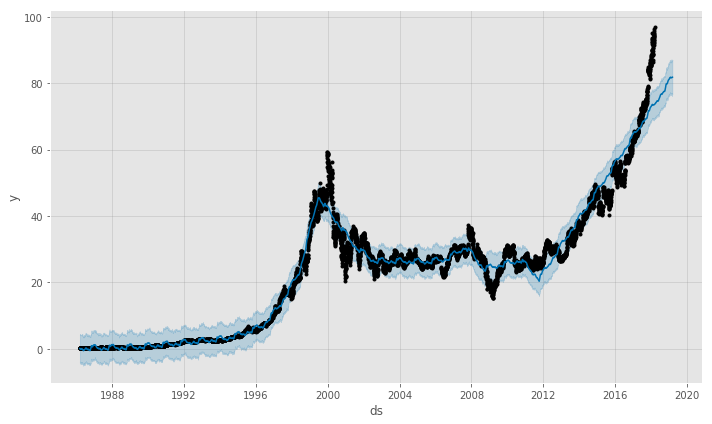

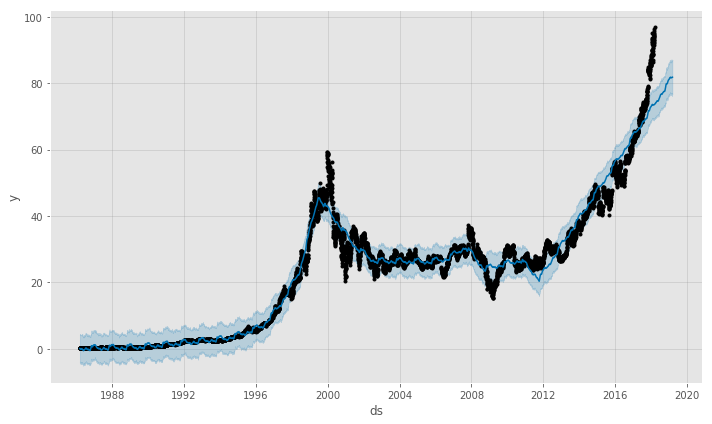

In [613]:
p = Prophet(daily_seasonality=True)
m = p.fit(df2)
future = p.make_future_dataframe(periods=365)
print(df2.tail())
print(future.tail())

forecast = p.predict(future)
print(forecast.tail())




p.plot(forecast)



In [614]:
df2.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)
print(df2.head())
print(forecast.head())

                   y
ds                  
1986-03-13  0.088542
1986-03-14  0.097222
1986-03-17  0.100694
1986-03-18  0.102431
1986-03-19  0.099826
               trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
ds                                                                       
1986-03-13  0.095216     0.095216     0.095216   -4.225911    4.230982   
1986-03-14  0.095542     0.095542     0.095542   -3.801872    4.437462   
1986-03-17  0.096520     0.096520     0.096520   -4.346860    4.518119   
1986-03-18  0.096846     0.096846     0.096846   -4.177733    4.220148   
1986-03-19  0.097172     0.097172     0.097172   -4.282893    4.295560   

               daily  daily_lower  daily_upper  seasonal  seasonal_lower  \
ds                                                                         
1986-03-13  0.029842     0.029842     0.029842 -0.038433       -0.038433   
1986-03-14  0.029842     0.029842     0.029842 -0.040228       -0.040228   
1986-03-17  0.029842     0.029

In [615]:
viz_df = df2.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
print(viz_df.head())
print(viz_df.tail())


                   y      yhat  yhat_lower  yhat_upper
ds                                                    
1986-03-13  0.088542  0.056783   -4.225911    4.230982
1986-03-14  0.097222  0.055315   -3.801872    4.437462
1986-03-17  0.100694  0.008839   -4.346860    4.518119
1986-03-18  0.102431  0.001991   -4.177733    4.220148
1986-03-19  0.099826  0.003979   -4.282893    4.295560
             y       yhat  yhat_lower  yhat_upper
ds                                               
2019-03-09 NaN  81.770973   76.774768   86.880910
2019-03-10 NaN  81.783649   76.879428   87.056827
2019-03-11 NaN  81.790436   76.713809   86.948102
2019-03-12 NaN  81.801724   76.762373   87.083034
2019-03-13 NaN  81.822432   76.753751   87.064142


                   y      yhat  yhat_lower  yhat_upper  yhat_rescaled
ds                                                                   
1986-03-13  0.088542  0.056783   -4.225911    4.230982       1.058426
1986-03-14  0.097222  0.055315   -3.801872    4.437462       1.056873
1986-03-17  0.100694  0.008839   -4.346860    4.518119       1.008878
1986-03-18  0.102431  0.001991   -4.177733    4.220148       1.001993
1986-03-19  0.099826  0.003979   -4.282893    4.295560       1.003987
             y       yhat  yhat_lower  yhat_upper  yhat_rescaled
ds                                                              
2019-03-09 NaN  81.770973   76.774768   86.880910   3.255986e+35
2019-03-10 NaN  81.783649   76.879428   87.056827   3.297519e+35
2019-03-11 NaN  81.790436   76.713809   86.948102   3.319975e+35
2019-03-12 NaN  81.801724   76.762373   87.083034   3.357665e+35
2019-03-13 NaN  81.822432   76.753751   87.064142   3.427921e+35


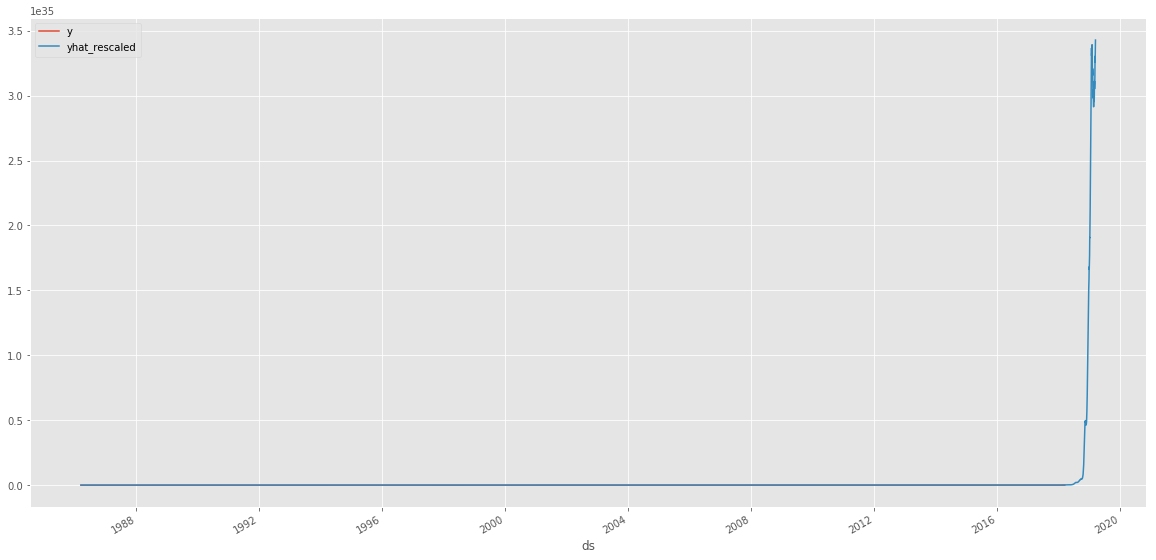

In [616]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])
print(viz_df.head())
print(viz_df.tail())
viz_df[['y','yhat_rescaled']].plot()
df2.index = pd.to_datetime(df2.index) #make sure our index as a datetime object
connect_date = df2.index[-2] #select the 2nd to last date


In [617]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]
viz_df = df2.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])
#print(viz_df['yhat_new']=df2.join(predict_df[['yhat']], how = 'inner')))

In [618]:
print(viz_df.head())
print(viz_df)
#the column with the pridected values from fbprophet
print(df2)

                   y  yhat  yhat_lower  yhat_upper  yhat_scaled
ds                                                             
1986-03-13  0.088542   NaN         NaN         NaN          NaN
1986-03-14  0.097222   NaN         NaN         NaN          NaN
1986-03-17  0.100694   NaN         NaN         NaN          NaN
1986-03-18  0.102431   NaN         NaN         NaN          NaN
1986-03-19  0.099826   NaN         NaN         NaN          NaN
                   y       yhat  yhat_lower  yhat_upper   yhat_scaled
ds                                                                   
1986-03-13  0.088542        NaN         NaN         NaN           NaN
1986-03-14  0.097222        NaN         NaN         NaN           NaN
1986-03-17  0.100694        NaN         NaN         NaN           NaN
1986-03-18  0.102431        NaN         NaN         NaN           NaN
1986-03-19  0.099826        NaN         NaN         NaN           NaN
1986-03-20  0.098090        NaN         NaN         NaN       

# important

In [633]:
dff=pd.DataFrame()
b=df2['y'].dropna()
m=viz_df['yhat'].dropna()
dff=b.append(m)
dff = dff[~dff.index.duplicated(keep='first')]
#dff.index.drop_duplicates(keep = 'first')
#df.drop(['2018-03-13'])
dff=dff.to_frame()
dff = dff.rename(columns={dff.columns[0]:'open'})
dff.index.rename('date',inplace=True)
#pd.concat([b,m]).reindex_like(b)
print(dff)

                 open
date                 
1986-03-13   0.088542
1986-03-14   0.097222
1986-03-17   0.100694
1986-03-18   0.102431
1986-03-19   0.099826
1986-03-20   0.098090
1986-03-21   0.095486
1986-03-24   0.092882
1986-03-25   0.090278
1986-03-26   0.092014
1986-03-27   0.094618
1986-03-31   0.096354
1986-04-01   0.095486
1986-04-02   0.094618
1986-04-03   0.096354
1986-04-04   0.096354
1986-04-07   0.096354
1986-04-08   0.094618
1986-04-09   0.095486
1986-04-10   0.097222
1986-04-11   0.098958
1986-04-14   0.099826
1986-04-15   0.100694
1986-04-16   0.100694
1986-04-17   0.104167
1986-04-18   0.105035
1986-04-21   0.101563
1986-04-22   0.101563
1986-04-23   0.099826
1986-04-24   0.100260
...               ...
2019-02-12  81.683578
2019-02-13  81.682912
2019-02-14  81.703733
2019-02-15  81.703864
2019-02-16  81.674637
2019-02-17  81.672200
2019-02-18  81.663857
2019-02-19  81.659975
2019-02-20  81.665463
2019-02-21  81.692284
2019-02-22  81.698189
2019-02-23  81.674463
2019-02-24